
# Auther :- Arun Kumar

## 10/3/2021
## A quick tutorial on how to implement linear regressions with the Python

# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model



Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python

Pandas is an important Machine Learning tool that is used for analysis and cleaning up data. If using Python, it is an essential library to reference. Pandas allow for various file exploration and data manipulation and are user friendly for beginners

NumPy is a standard Python library that adds support for multi-dimensional arrays and matrices. NumPy is used for various scientific computing in Python, and its core, NumPy, focuses on the ndarry object.

# Imported Needed Package

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Input dataset

In [73]:
Inputdata = pd.read_csv('C:\PythonData\SalaryData\SalaryData.csv')
Inputdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [74]:
Inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [75]:
# Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
Inputdata.shape

(30, 2)

In [76]:
# This describes the basic stat behind the dataset used 
Inputdata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [77]:
# check Null values in the dataset
Inputdata.isnull().values.any()

False

<Figure size 864x432 with 0 Axes>

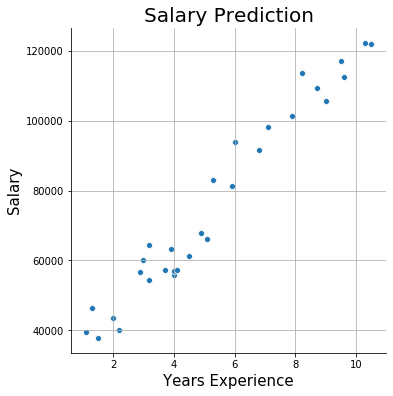

In [78]:
# Input data Visulaization

plt.figure(figsize=(12,6))
sns.pairplot(Inputdata,x_vars=['YearsExperience'],y_vars=['Salary'], height=5,kind='scatter')
plt.xlabel('Years Experience', fontsize='15')
plt.ylabel('Salary',fontsize='15')
plt.title('Salary Prediction', fontsize='20')
plt.grid (True)
plt.show()

In [79]:
Results = pd.DataFrame({'Algorithm': [],'MAE': [], 'R^2': [], "MSE":[], "RMSE":[]})

In [80]:
X = Inputdata['YearsExperience'].values.reshape(-1,1)
y = Inputdata['Salary'].values.reshape(-1,1)

In [81]:
# Import Segregating data from scikit learn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [82]:
DataSplit_TrainXy = pd.DataFrame({ 'Training_X': X_train.flatten(), 'Train_Y':y_train.flatten()})
DataSplit_TrainXy

,Training_X,Train_Y
0,9.6,112635.0
1,9.0,105582.0
2,3.0,60150.0
3,5.3,83088.0
4,7.9,101302.0
5,4.0,55794.0
6,2.2,39891.0
7,10.5,121872.0
8,1.1,39343.0
9,1.3,46205.0


In [83]:
# To Check the dimension of the Training Data after split ( X & y)
X_train.shape,y_train.shape

((24, 1), (24, 1))

In [84]:
DataSplit_TestXy = pd.DataFrame({ 'Training_X': X_test.flatten(), 'Train_Y':y_test.flatten()})
DataSplit_TestXy

,Training_X,Train_Y
0,3.7,57189.0
1,9.5,116969.0
2,10.3,122391.0
3,4.1,57081.0
4,2.9,56642.0
5,4.0,56957.0


In [85]:
# To Check the dimension of the Test Data after split ( X & y)
X_test.shape,y_test.shape

((6, 1), (6, 1))

In [86]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

#Create linear regression object
regressor= LinearRegression ()
# Train the model using the training data
regressor.fit(X_train,y_train)
# Predicting the Salary for the Test values
y_pred=regressor.predict(X_test)

In [87]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: [26819.0651187]
Coefficient of the line: [[9361.11639032]]


In [88]:
#RegPara = pd.DataFrame({'Intercept of the model': [regressor.intercept_],'Coefficient of the line ': [regressor.coef_]})
RegPara = pd.DataFrame({'Intercept of the model': [regressor.intercept_],'Coefficient of the line ': [regressor.coef_]})
RegPara

,Intercept of the model,Coefficient of the line
0,[26819.06511870089],[[9361.116390321686]]


In [89]:
# Compare the actual and predicted output values for X_test with predicted values 
df = pd.DataFrame({'Years of Experience': X_test.flatten(), 'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Years of Experience,Actual,Predicted
0,3.7,57189.0,61455.195763
1,9.5,116969.0,115749.670827
2,10.3,122391.0,123238.563939
3,4.1,57081.0,65199.642319
4,2.9,56642.0,53966.302651
5,4.0,56957.0,64263.530680


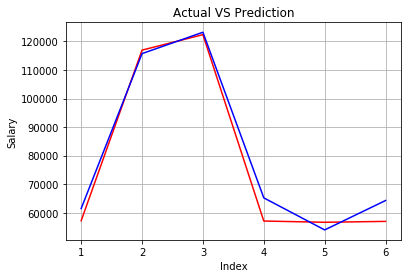

In [90]:
# Plotting the actual and predicted values 
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',)
plt.plot(c,y_pred,color='b',linestyle='-',)
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title("Actual VS Prediction",fontsize='12')
plt.grid (True)
plt.show()

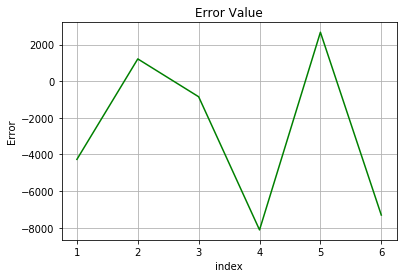

In [91]:
# plotting the error
error=y_test.flatten()-y_pred.flatten()
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c, error, color='green', label="error", linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value',fontsize='12')
plt.grid (True)
plt.show()

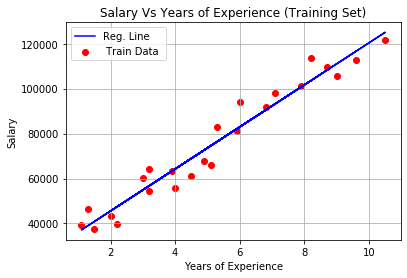

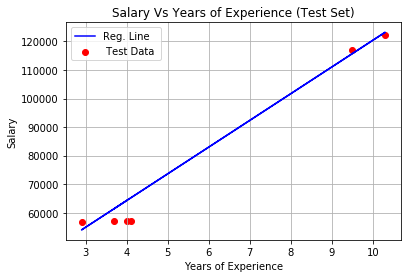

In [92]:
# Data visualization 
plt.scatter(X_train, y_train, color='red', label=" Train Data ")                      # Training data point
plt.plot(X_train,regressor.predict(X_train), color="blue", label="Reg. Line")         # regression line
plt.title("Salary Vs Years of Experience (Training Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='red', label=" Test Data ")                      # Testing data point
plt.plot(X_test,regressor.predict(X_test), color="blue", label="Reg. Line")       # regression line
plt.title("Salary Vs Years of Experience (Test Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()


In [93]:
# Regression Model Accurancy Metrics
# The Mean Absolute error(MAE), Mean squared error (MSE), Root mean squared error (RMSE), and R-Squared-
# are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.

# Mean Absolute Error (MAE) is the mean of the absolute value of the errors​.
# Mean Squared Error (MSE) is the mean of the squared errors 
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt 

print('Mean absolute error (MAE):->', mean_absolute_error(y_test, y_pred))
print('Mean Square error (MSE):->', mean_squared_error(y_test, y_pred))
print('Root mean Square Error (RMSE):->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score :->', r2_score(y_test,y_pred))

res = pd.DataFrame({'Algorithm': ['LinearRegression'],'MAE': [mean_absolute_error(y_test, y_pred)],"R^2": [r2_score(y_test, y_pred)], "MSE":[mean_squared_error(y_test, y_pred)], "RMSE":[sqrt(mean_squared_error(y_test, y_pred))]})
Results = Results.append(res)

Mean absolute error (MAE):-> 4072.3265372536903
Mean Square error (MSE):-> 24477109.08965574
Root mean Square Error (RMSE):-> 4947.434596804261
r2 score :-> 0.9720725422361338


In [94]:
Results

,Algorithm,MAE,R^2,MSE,RMSE
0,LinearRegression,4072.326537,0.972073,2.447711e+07,4947.434597


In [ ]:
# Prediction

# YearsExperience (X)
X= input(" Enter the years of experience to predict the salary :-> ")
y_pred=regressor.intercept_+regressor.coef_*float(X)
print(f'The predicted salary values based on the {X} year of experience  :- ', y_pred)